In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

root_dir = "../"
explanation_dir = os.path.join(root_dir, "explanations")
data_dir = os.path.join(root_dir, "data")
figure_dir = os.path.join(data_dir, "figures", "ablation_curves")

exp_mapper = {
    "gradcam": r"Grad-CAM",
    "lime": r"LIME",
    "gradexp": r"GradientExp",
    "deepexp": r"DeepExp",
    "partexp/500": r"PartitionExp ($m = 500$)",
    # "partexp/64": r"PartitionExp ($m = 64$)",
    # "partexp/32": r"PartitionExp ($m = 32$)",
    # "partexp/16": r"PartitionExp ($m = 16$)",
    "hexp/absolute_0": r"h-Shap ($\tau = 0$)",
    # "hexp/relative_70": r"h-Shap ($\tau=70\%$)",
}

true_positives = np.load(
    os.path.join(explanation_dir, "true_positive.npy"), allow_pickle=True
).item()

100%|██████████| 6/6 [00:00<00:00, 21.36it/s]


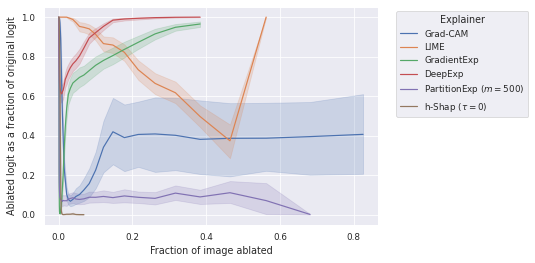

In [2]:
sns.set_theme(font_scale=1.5)
sns.set_context("paper")

for n in [1, 6]:
    df_clips = []
    for exp_name in tqdm(exp_mapper.keys()):
        df = pd.read_csv(
            os.path.join(explanation_dir, exp_name, f"ablation_curves_{n}.csv")
        )
        df_clips.append(df)
    df = pd.concat(df_clips)
    df.set_index("index", inplace=True)

    sns.lineplot(
        data=df,
        x="size",
        y="logit",
        hue="exp_title",
        err_style="band",
        ci=95,
    )
    plt.xlabel("Fraction of image ablated")
    plt.ylabel("Ablated logit as a fraction of original logit")
    legend = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title=r"Explainer")

    plt.savefig(
        os.path.join(figure_dir, f"ablation_curves_{n}.jpg"), bbox_inches="tight"
    )
    plt.savefig(
        os.path.join(figure_dir, f"ablation_curves_{n}.pdf"), bbox_inches="tight"
    )
    plt.show()
    plt.close()